<a href="https://colab.research.google.com/github/ezypzylemon/12month/blob/main/1016_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tmp=tf.keras.datasets.fashion_mnist.load_data()
list(tmp)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


[(array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
len(x_train), len(y_train) , x_train.shape, x_val.shape

(60000, 60000, (60000, 28, 28), (10000, 28, 28))

In [24]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

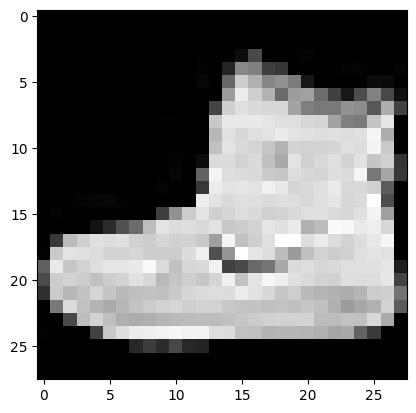

In [9]:
plt.imshow(x_train[0], cmap='gray')

In [13]:
# 데이터 전처리 (0~255 값을 0~1로 정규화)
x_train, x_val = x_train / 255.0, x_val / 255.0

In [14]:
# 데이터 차원 맞추기 (배치 크기, 높이, 너비, 채널)
# conv2d에서는 반드시 높이,너비,채널
# 원데이터가 높이,너비 만 있어서, 높이,너비,1로 변경해야함


x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [21]:
# 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10개 클래스
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss',  # 검증 손실을 모니터링
                               patience=3,         # 3번의 에포크 동안 손실이 개선되지 않으면 종료
                               restore_best_weights=True)  # 최고의 모델을 유지

# 모델 학습 (조기 종료 적용)
history = model.fit(x_train, y_train,
                    epochs=50,  # 최대 50 에포크
                    batch_size=100,              # 배치사이즈 조절함 64 -> 100
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])  # 콜백으로 조기 종료 추가

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 83ms/step - accuracy: 0.7414 - loss: 0.6896 - val_accuracy: 0.8343 - val_loss: 0.4614
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.8594 - loss: 0.3911 - val_accuracy: 0.8713 - val_loss: 0.3655
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.8802 - loss: 0.3294 - val_accuracy: 0.8710 - val_loss: 0.3457
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8955 - loss: 0.2865 - val_accuracy: 0.8872 - val_loss: 0.3137
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.9003 - loss: 0.2692 - val_accuracy: 0.8966 - val_loss: 0.2812
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 50s 83ms/step - accuracy: 0.9112 - loss: 0.2463 - val_accuracy: 0.8973 - val_loss: 0.2816
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.9167 - loss: 0.2325 - val_accuracy: 0.9005 - val_loss: 0.2692
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - accuracy: 0.9212 - loss: 0.2123 - 

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])